<a href="https://colab.research.google.com/github/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10/blob/main/experiments/train_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Env**

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10.git

# **Import**

In [4]:
# Imports
import sys
import os
import torch
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Add the root directory of the cloned repository to the Python path
sys.path.append('/content/Comparative-analysis-of-Generative-models-on-CIFAR-10')

import importlib
import data.cifar10 as cifar10_module
import utils.checkpointer as checkpointer_module
import train.train as train_module
import models.VAE_models.conv_vae as conv_vae_module
import samplers.vae_sampler as vae_sampler_module
import utils.weight_init as weight_module
import models.VAE_models.vqvae as vqvae_module
import models.VAE_models.pixelcnn as pixelcnn_module
import models.VAE_models.mmdvae as mmdvae_module
importlib.reload(cifar10_module)
importlib.reload(checkpointer_module)
importlib.reload(train_module)
importlib.reload(conv_vae_module)
importlib.reload(vae_sampler_module)
importlib.reload(weight_module)
importlib.reload(vqvae_module)
importlib.reload(pixelcnn_module)
importlib.reload(mmdvae_module)
from data.cifar10 import load_cifar10
from utils.checkpointer import Checkpointer
from train.train import Train
from models.VAE_models.conv_vae import ConvVAE
from samplers.vae_sampler import vae_sample
from utils.weight_init import WeightsInitializer
from models.VAE_models.vqvae import VQVAE
from models.VAE_models.pixelcnn import PixelCNN
from models.VAE_models.mmdvae import MMDVAE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


# **Load Cifar Data**

In [3]:
train_loader, _ = load_cifar10(batch_size=256)

100%|██████████| 170M/170M [00:20<00:00, 8.50MB/s]


In [9]:
import matplotlib.pyplot as plt
from torchvision import transforms

def show_img(img):
    if img.dim() == 4:
        img = img[0]

    img = img.detach().cpu().clamp(0, 1)
    img = img.permute(1, 2, 0)  # CHW -> HWC

    h, w, _ = img.shape
    dpi = 100  # matplotlib default

    # plt.figure(figsize=(w / dpi, h / dpi), dpi=dpi)
    # plt.imshow(img, interpolation='none')  # <- critical

    plt.figure(figsize=(2, 2))
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    plt.show()

# **Train VaeGan**

In [17]:
%%capture
model = MMDVAE(beta=10.0).to(device)
model.apply(WeightsInitializer())

In [25]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/MmdVaeV1"
checkpointer = Checkpointer(checkpoint_dir,"MmdVae",1,False)
train = Train(model,300,train_loader,checkpointer,device)
train.load_checkpoint()
# torch.autograd.set_detect_anomaly(True)
train.train()

Loaded latest checkpoint: /content/drive/MyDrive/checkpoints_final/MmdVaeV1/MmdVae_epoch_200.pt
Epoch: 201  {'loss': 12.038657018116542, 'recon': 12.009365461310562, 'mmd': 0.002929155019881698}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/MmdVaeV1/MmdVae_epoch_201.pt
Epoch: 202  {'loss': 12.01447692695929, 'recon': 11.98613530275773, 'mmd': 0.00283415999075835}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/MmdVaeV1/MmdVae_epoch_202.pt
Epoch: 203  {'loss': 12.02525207461143, 'recon': 11.996139613949524, 'mmd': 0.0029112480976381245}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/MmdVaeV1/MmdVae_epoch_203.pt
Epoch: 204  {'loss': 12.000114903158071, 'recon': 11.971344110917071, 'mmd': 0.002877079329942828}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/MmdVaeV1/MmdVae_epoch_204.pt
Epoch: 205  {'loss': 12.01322613443647, 'recon': 11.984906352296168, 'mmd': 0.002831979191443902}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/Mm

[{'loss': 165.6024369998854,
  'recon': 122.19882836633799,
  'mmd': 0.43403608792898607},
 {'loss': 76.43464964263293,
  'recon': 70.32333959851947,
  'mmd': 0.06111310101209246},
 {'loss': 65.33521243504116,
  'recon': 60.73924004301733,
  'mmd': 0.04595972447447023},
 {'loss': 55.409053276996225,
  'recon': 51.556891421882476,
  'mmd': 0.03852161875336754},
 {'loss': 48.4408348239198,
  'recon': 45.10537968849649,
  'mmd': 0.03335455067607821},
 {'loss': 44.013551887200805,
  'recon': 41.05472257185956,
  'mmd': 0.029588292771000033},
 {'loss': 40.84621053812455,
  'recon': 38.14495065260907,
  'mmd': 0.027012598263669987},
 {'loss': 38.47560874783263,
  'recon': 35.97816539297298,
  'mmd': 0.024974434294414764},
 {'loss': 36.80934798960783,
  'recon': 34.48607909922697,
  'mmd': 0.02323268804395077},
 {'loss': 35.275938676328074,
  'recon': 33.118349269944794,
  'mmd': 0.021575894007193192},
 {'loss': 33.85884315140393,
  'recon': 31.835093430110387,
  'mmd': 0.020237495438480864},

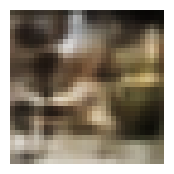

In [26]:
images = model.sample(16)
show_img(images[4])

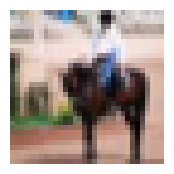

In [ ]:
train_dataset = train_loader.dataset
img = train_dataset[11][0]
show_img(img)

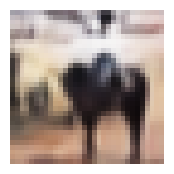

In [ ]:
# print(img.unsqueeze(0) .shape)
img = train_dataset[11][0]
model.eval()
with torch.no_grad():
  recon = model(img.unsqueeze(0).to(device))
show_img(recon[0])

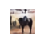

In [ ]:
# recon.shape
show_img(recon[0])
# indices.shape

In [ ]:
z = []
for x,_ in train_loader:
    z.append(model.encoder(x.to(device))[0])
z = torch.cat(z)

In [ ]:
z.mean(dim=0)

tensor([-7.1187e-01,  5.9387e-02,  7.1789e-02, -8.5871e-02,  2.0844e-01,
        -1.6599e-01,  2.5077e-01,  5.5593e-02,  1.4507e-01,  2.5865e-01,
        -4.1306e-02, -4.8887e-02, -5.3403e-02, -4.2876e-02, -4.9895e-01,
        -6.3468e-02,  4.0471e-01, -5.0234e-02,  9.4303e-02, -1.8874e-01,
         3.1554e-01, -1.6967e-02,  4.1268e-02,  2.8053e-02, -6.6830e-01,
         9.6820e-02,  7.0774e-02,  8.0894e-01,  5.1275e-01, -5.2718e-01,
        -1.0152e-02,  3.4032e-01, -6.5877e-02,  3.1094e-01,  1.1374e-01,
         7.5870e-04, -2.7655e-01, -6.1586e-02,  1.4842e-01,  5.4139e-02,
         4.0607e-01,  2.7213e-01,  8.8107e-02, -2.4810e-02,  2.5715e-01,
         6.4530e-02, -5.0508e-02, -8.1528e-02,  3.1513e-02, -4.8559e-03,
         1.8720e-02, -1.5852e-01, -1.3013e-02,  3.0998e-02,  9.0793e-03,
         2.0303e-01,  4.3942e-01,  4.1831e-02,  1.0096e-01,  1.9769e-02,
        -2.6447e-01, -6.3579e-02,  7.5658e-02, -2.3550e-02, -6.2754e-03,
         5.0698e-02, -8.3621e-02, -2.2321e-01, -4.4

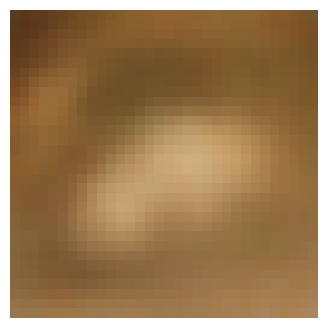

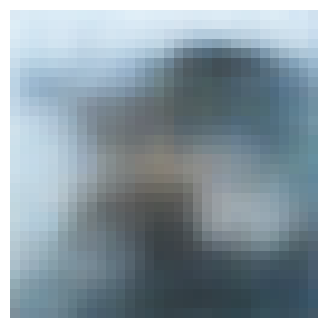

In [ ]:
decoder = model.decoder

x = model.forward(img.unsqueeze(0).to(device))
show_img(x[0])

sample = vae_sample(decoder,1)
show_img(sample[0])